# Artificial Recurrent Neural Network LTSM  (Long short-term memory) 
Prof. Fernando Amaral

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
import math

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12,6

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("/Users/marcos/Documents/00_Git_Projetos/SeriesTemporais/SeriesTemporais_Python/Download/Dados/international-airline-passengers.csv", usecols=[1], skipfooter=3, engine='python')

In [3]:
df.head()

,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,112
1,118
2,132
3,129
4,121


In [4]:
df.shape

(144, 1)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 1 columns):
 #   Column                                                                          Non-Null Count  Dtype
---  ------                                                                          --------------  -----
 0   International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60  144 non-null    int64
dtypes: int64(1)
memory usage: 1.2 KB


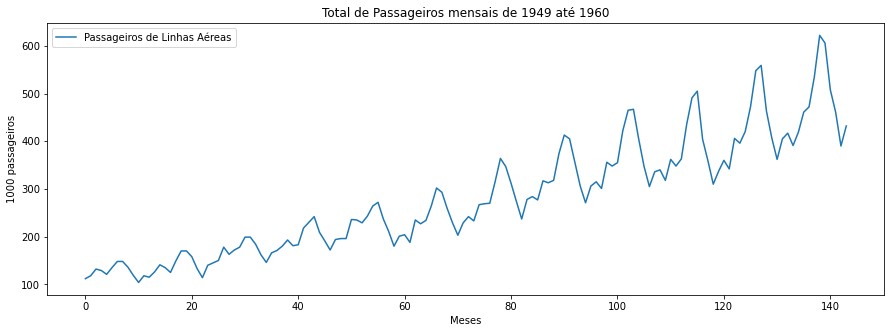

In [6]:
#visualizar os dados observados
plt.figure(figsize=(15,5))
plt.plot(df, label='Passageiros de Linhas Aéreas')
plt.xlabel('Meses')
plt.ylabel('1000 passageiros')
plt.title('Total de Passageiros mensais de 1949 até 1960')
plt.legend()
plt.show()

In [7]:
# Transformando para formato float32
data_raw = df.values.astype('float32') # transformando para o formato float32
scaler = MinMaxScaler(feature_range=(0,1)) # normalização do Keras
dataset = scaler.fit_transform(data_raw) # normalizando os dados

In [8]:
# Dividindo os dados em treino e teste
TRAIN_SIZE = 0.75
train_size = int(len(dataset) * TRAIN_SIZE)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[test_size:len(dataset),:]
print('Numero de observações (dados de treino, dados de teste): ' + str((len(train),len(test))))

Numero de observações (dados de treino, dados de teste): (108, 108)


In [9]:
# Formatando os dados para o Keras
def create_dataset(dataset, window_size=1):
    data_X, data_Y = [],[]
    for i in range(len(dataset) - window_size - 1):
        a = dataset[i:(i + window_size),0]
        data_X.append(a)
        data_Y.append(dataset[i + window_size,0])
    return(np.array(data_X), np.array(data_Y))                    

In [11]:
# Utilizando a função create_dateset para criar treino e teste
window_size = 1
train_X, train_Y = create_dataset(train, window_size)
test_X, test_Y = create_dataset(test, window_size)
print('Formato original dos dados de treino:')
print(train_X.shape)

# reshape no formato do Keras
train_X = np.reshape(train_X, (train_X.shape[0],1,train_X.shape[1]))
test_X = np.reshape(test_X, (test_X.shape[0],1,test_X.shape[1]))
print('Novo formato de treino:')
print(train_X.shape)

Formato original dos dados de treino:
(106, 1)
Novo formato de treino:
(106, 1, 1)


In [12]:
# Inicializando o modelo
model = Sequential()

In [13]:
# Determinando a função de perde LSTM
model.add(LSTM(4, input_shape = (1, window_size)))

In [14]:
# adicionando camada densa
model.add(Dense(1))

In [18]:
# compilando o modelo, definando a função de perda e optimizer
model.compile(loss = 'mean_squared_error', optimizer='adam')

In [19]:
# executando o fit do modelo
model.fit(train_X, train_Y, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
106/106 - 5s - loss: 0.0398 - 5s/epoch - 43ms/step
Epoch 2/100
106/106 - 0s - loss: 0.0189 - 483ms/epoch - 5ms/step
Epoch 3/100
106/106 - 0s - loss: 0.0148 - 452ms/epoch - 4ms/step
Epoch 4/100
106/106 - 1s - loss: 0.0131 - 565ms/epoch - 5ms/step
Epoch 5/100
106/106 - 0s - loss: 0.0118 - 438ms/epoch - 4ms/step
Epoch 6/100
106/106 - 0s - loss: 0.0104 - 325ms/epoch - 3ms/step
Epoch 7/100
106/106 - 0s - loss: 0.0091 - 252ms/epoch - 2ms/step
Epoch 8/100
106/106 - 0s - loss: 0.0079 - 368ms/epoch - 3ms/step
Epoch 9/100
106/106 - 0s - loss: 0.0068 - 317ms/epoch - 3ms/step
Epoch 10/100
106/106 - 0s - loss: 0.0057 - 344ms/epoch - 3ms/step
Epoch 11/100
106/106 - 0s - loss: 0.0049 - 309ms/epoch - 3ms/step
Epoch 12/100
106/106 - 0s - loss: 0.0041 - 348ms/epoch - 3ms/step
Epoch 13/100
106/106 - 0s - loss: 0.0036 - 308ms/epoch - 3ms/step
Epoch 14/100
106/106 - 0s - loss: 0.0032 - 247ms/epoch - 2ms/step
Epoch 15/100
106/106 - 0s - loss: 0.0029 - 245ms/epoch - 2ms/step
Epoch 16/100
106/106 